In [160]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score, mean_absolute_error, max_error, mean_squared_error, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

import keras

import plotly.express as px

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [161]:
df = pd.read_csv("./student_depression_dataset.csv", nrows=1000)

In [162]:
df.replace('?', 0, inplace=True)
df.drop(["Study Satisfaction", "Sleep Duration", "Dietary Habits"], axis=1, inplace=True)
Oenc = OrdinalEncoder()
df[["Gender", "City", "Profession", "Job Satisfaction", "Degree", 
    "Have you ever had suicidal thoughts ?", "Family History of Mental Illness"]] = \
    Oenc.fit_transform(df[["Gender", "City", "Profession", "Job Satisfaction", "Degree", 
                          "Have you ever had suicidal thoughts ?", "Family History of Mental Illness"]])
df

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Job Satisfaction,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,1.0,33.0,29.0,2.0,5.0,0.0,8.97,0.0,4.0,1.0,3.0,1.0,0.0,1
1,8,0.0,24.0,2.0,2.0,2.0,0.0,5.90,0.0,11.0,0.0,3.0,2.0,1.0,0
2,26,1.0,31.0,23.0,2.0,3.0,0.0,7.03,0.0,6.0,0.0,9.0,1.0,1.0,0
3,30,0.0,28.0,27.0,2.0,3.0,0.0,5.59,0.0,8.0,1.0,4.0,5.0,1.0,1
4,32,0.0,25.0,10.0,2.0,4.0,0.0,8.13,0.0,17.0,1.0,1.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,5128,1.0,30.0,23.0,2.0,4.0,0.0,6.99,0.0,5.0,1.0,0.0,3.0,1.0,0
996,5130,0.0,28.0,11.0,2.0,3.0,0.0,9.60,0.0,5.0,1.0,2.0,5.0,1.0,1
997,5136,1.0,28.0,24.0,2.0,4.0,0.0,5.74,0.0,16.0,0.0,6.0,1.0,1.0,0
998,5142,0.0,31.0,5.0,2.0,3.0,0.0,8.93,0.0,13.0,0.0,12.0,1.0,0.0,0


<Axes: >

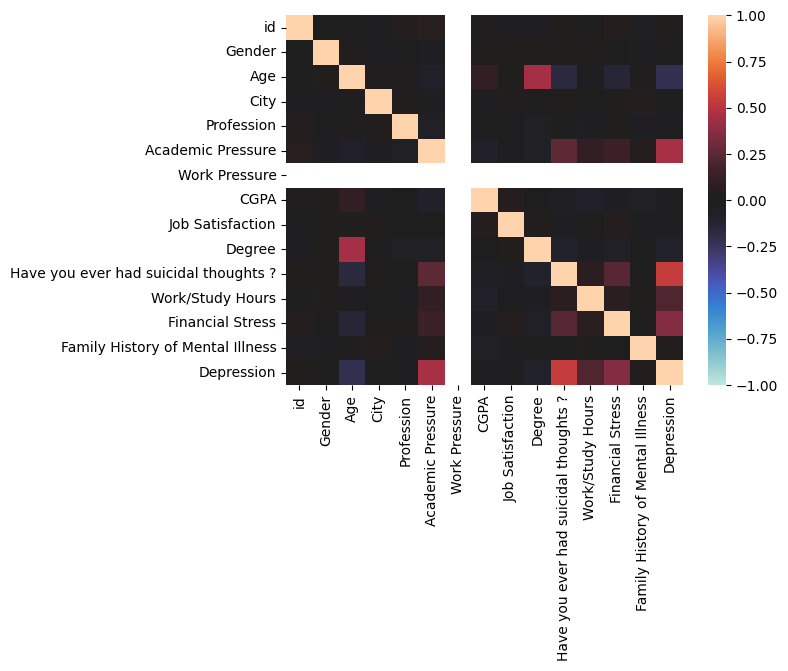

In [163]:
sns.heatmap(df.corr(), vmin=-1, center=0, vmax=1) 

In [164]:
train,validation, test = np.split(df, [int(.7*len(df)), int(.9*len(df))])


In [165]:
train

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Job Satisfaction,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,1.0,33.0,29.0,2.0,5.0,0.0,8.97,0.0,4.0,1.0,3.0,1.0,0.0,1
1,8,0.0,24.0,2.0,2.0,2.0,0.0,5.90,0.0,11.0,0.0,3.0,2.0,1.0,0
2,26,1.0,31.0,23.0,2.0,3.0,0.0,7.03,0.0,6.0,0.0,9.0,1.0,1.0,0
3,30,0.0,28.0,27.0,2.0,3.0,0.0,5.59,0.0,8.0,1.0,4.0,5.0,1.0,1
4,32,0.0,25.0,10.0,2.0,4.0,0.0,8.13,0.0,17.0,1.0,1.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,3590,0.0,32.0,11.0,2.0,5.0,0.0,5.32,0.0,12.0,1.0,8.0,4.0,0.0,1
696,3594,0.0,33.0,19.0,2.0,4.0,0.0,7.88,0.0,13.0,0.0,11.0,5.0,1.0,1
697,3596,1.0,24.0,3.0,2.0,5.0,0.0,7.88,0.0,7.0,1.0,8.0,4.0,0.0,1
698,3599,0.0,27.0,7.0,2.0,2.0,0.0,7.43,0.0,16.0,1.0,7.0,5.0,0.0,1


In [166]:
validation 

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Job Satisfaction,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
700,3607,0.0,23.0,25.0,2.0,5.0,0.0,6.86,0.0,10.0,0.0,0.0,5.0,1.0,0
701,3611,0.0,27.0,23.0,2.0,5.0,0.0,7.77,0.0,9.0,1.0,11.0,5.0,1.0,1
702,3612,0.0,28.0,23.0,2.0,2.0,0.0,9.69,0.0,8.0,1.0,7.0,2.0,0.0,1
703,3617,0.0,23.0,26.0,2.0,4.0,0.0,9.93,0.0,19.0,0.0,10.0,4.0,0.0,1
704,3639,1.0,34.0,3.0,2.0,4.0,0.0,8.19,0.0,22.0,1.0,0.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,4615,0.0,27.0,8.0,2.0,3.0,0.0,7.92,0.0,13.0,0.0,11.0,1.0,1.0,0
896,4618,0.0,26.0,2.0,2.0,5.0,0.0,5.99,0.0,5.0,1.0,7.0,1.0,0.0,1
897,4621,1.0,23.0,21.0,2.0,1.0,0.0,9.39,0.0,2.0,1.0,9.0,5.0,1.0,0
898,4624,1.0,21.0,29.0,2.0,5.0,0.0,6.21,0.0,2.0,0.0,10.0,2.0,1.0,1


In [167]:
test

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Job Satisfaction,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
900,4643,0.0,22.0,28.0,2.0,4.0,0.0,8.07,0.0,19.0,1.0,4.0,4.0,1.0,1
901,4647,0.0,31.0,8.0,2.0,3.0,0.0,9.33,0.0,15.0,1.0,10.0,4.0,1.0,1
902,4657,1.0,23.0,16.0,2.0,2.0,0.0,8.04,0.0,5.0,1.0,8.0,1.0,0.0,1
903,4661,1.0,20.0,8.0,2.0,4.0,0.0,5.16,0.0,0.0,0.0,5.0,4.0,1.0,1
904,4668,0.0,26.0,4.0,2.0,5.0,0.0,5.85,0.0,22.0,0.0,4.0,2.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,5128,1.0,30.0,23.0,2.0,4.0,0.0,6.99,0.0,5.0,1.0,0.0,3.0,1.0,0
996,5130,0.0,28.0,11.0,2.0,3.0,0.0,9.60,0.0,5.0,1.0,2.0,5.0,1.0,1
997,5136,1.0,28.0,24.0,2.0,4.0,0.0,5.74,0.0,16.0,0.0,6.0,1.0,1.0,0
998,5142,0.0,31.0,5.0,2.0,3.0,0.0,8.93,0.0,13.0,0.0,12.0,1.0,0.0,0


In [168]:
Y_train = train['CGPA']
X_train = train.drop(columns='CGPA')

Y_valid = validation['CGPA']
X_valid = validation.drop(columns='CGPA')

Y_test = test['Work/Study Hours']
X_test = test.drop(columns='Work/Study Hours')

In [169]:
model_regression_1 = keras.Sequential([
    keras.layers.InputLayer(shape=(8,)),
    keras.layers.Dense (8, activation='relu'),
    keras.layers.Dense (18, activation='relu'),
    keras.layers.Dense (10, activation='relu'),
    keras.layers.Dense (7, activation='relu'),
    keras.layers.Dense (1)
])

In [170]:
model_regression_1.compile(
    optimizer=keras.optimizers.Adam(),
    loss='mse',
    metrics=['mean_absolute_error', 'r2_score']
)

In [171]:
history = model_regression_1.fit(
    X_train,
    Y_train,
    batch_size=150,
    epochs=500,
    validation_data=(X_valid, Y_valid),
    verbose='auto',
)

Epoch 1/500


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_53" is incompatible with the layer: expected axis -1 of input shape to have value 8, but received input with shape (None, 14)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 14), dtype=float32)
  • training=True
  • mask=None